<a href="https://colab.research.google.com/github/kishankasaudhan/NLP/blob/main/GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP Visualizing Embeddings

In [1]:
# Implementing Dimensionality Reduction
# Reducing number of features while  rpeserving the important information
# -We have to reduce dimension from 100D to 2D
# -Because we cannot visualize 100D
# This let us vusally see:
# Similar words cluster together
# Opposite words separate
# Semantic relationships

In [2]:
'''
#We can reduce Dimensions by using:
#1. PCA- Linear Reduction
#- PCA finds direction where data varies most
#-Directions= Principal Components

Suppose students:
-height and weight are correlated
-instead of 2 features- PCA create 1 new feature representing both

Steps of PCA:
1.Standardize data
2.Compute covariance matrix
3.Find eigenvectors
4.Select top components
5.Project the data


#2. t-SNE- Non Linear
#3. UMAP
'''

'\n#We can reduce Dimensions by using:\n#1. PCA- Linear Reduction\n#- PCA finds direction where data varies most\n#-Directions= Principal Components\n\nSuppose students:\n-height and weight are correlated\n-instead of 2 features- PCA create 1 new feature representing both\n\nSteps of PCA:\n1.Standardize data\n2.Compute covariance matrix\n3.Find eigenvectors\n4.Select top components\n5.Project the data\n\n\n#2. t-SNE- Non Linear\n#3. UMAP\n'

In [3]:
!pip install gensim
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 28.4 MB/s eta 0:00:00


In [4]:
model = api.load("glove-wiki-gigaword-100")
print("Model loaded successfully...")

[==================================================] 100.0% 128.1/128.1MB downloaded
Model loaded successfully...


In [5]:
words = [
    "king","queen","man","woman","dog","cat","animal","car","truck","vehicle",
    "happy","sad","joy","anger"
]
vectors = [model[word] for word in words]

In [6]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

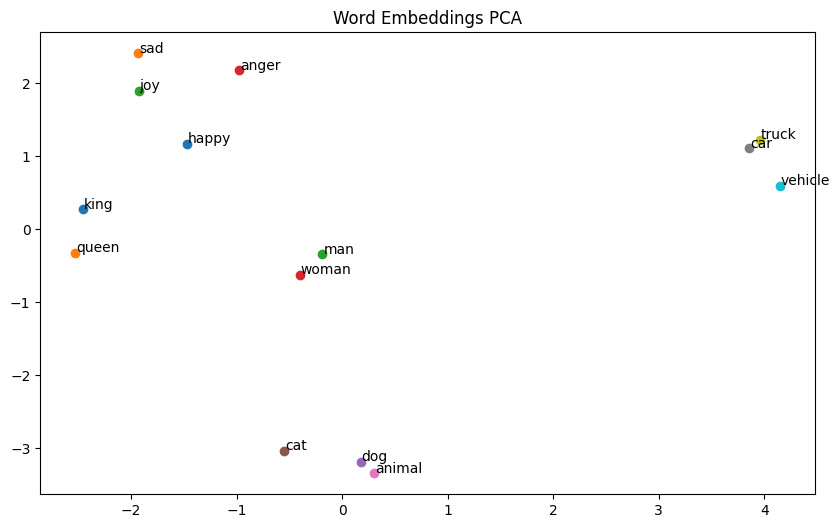

In [7]:
plt.figure(figsize=(10,6))
for i, word in enumerate(words):
  x = reduced[i][0]
  y = reduced[i][1]
  plt.scatter(x,y)
  plt.text(x+0.01,y+0.01,word)
plt.title("Word Embeddings PCA")
plt.show()

In [8]:
#using T_SNE
from sklearn.manifold import TSNE
import numpy as np

In [9]:
vectors = np.array([model[word] for word in words])

In [10]:
#perplexity - how many neighbours each point considers
tsne = TSNE(n_components=2,perplexity=3)
reduced = tsne.fit_transform(vectors)

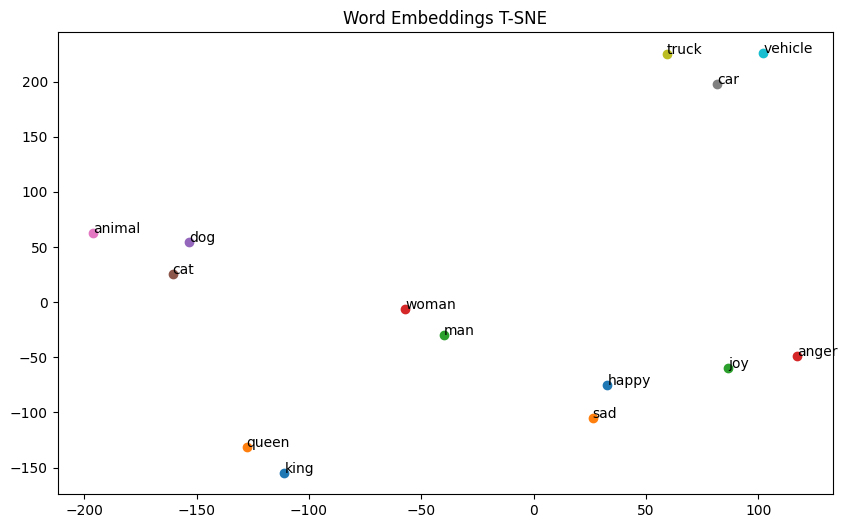

In [11]:
plt.figure(figsize=(10,6))
for i, word in enumerate(words):
  x = reduced[i][0]
  y = reduced[i][1]
  plt.scatter(x,y)
  plt.text(x+0.01,y+0.01,word)
plt.title("Word Embeddings T-SNE")
plt.show()